In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
 #   print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
 #         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#city_url = url + "&q=" + "Boston"
#city_weather = requests.get(city_url)

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Begining of Data Retrivel")
print("-------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
                            

Begining of Data Retrivel
-------------------------
Processing Record 1 of Set 1 | anori
Processing Record 2 of Set 1 | teknaf
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | sarangani
Processing Record 5 of Set 1 | arak
Processing Record 6 of Set 1 | vestmannaeyjar
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | lamar
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | basco
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | bonavista
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | belushya gu

Processing Record 36 of Set 4 | geraldton
Processing Record 37 of Set 4 | kamenka
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | tandalti
Processing Record 40 of Set 4 | san ramon
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | ituni
City not found. Skipping...
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | playa del carmen
Processing Record 47 of Set 4 | sokoto
Processing Record 48 of Set 4 | svetlyy
Processing Record 49 of Set 4 | berlevag
Processing Record 50 of Set 4 | auki
Processing Record 1 of Set 5 | binzhou
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | pangai
Processing Record 4 of Set 5 | rosa zarate
Processing Record 5 of Set 5 | murgab
Processing Record 6 of Set 5 | saint anthony
Processing Record 7 of Set 5 | nuuk
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | v

Processing Record 24 of Set 8 | boras
Processing Record 25 of Set 8 | praya
Processing Record 26 of Set 8 | pelotas
Processing Record 27 of Set 8 | sayyan
Processing Record 28 of Set 8 | ust-omchug
Processing Record 29 of Set 8 | yulara
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | rock sound
Processing Record 32 of Set 8 | lavrentiya
Processing Record 33 of Set 8 | waipawa
Processing Record 34 of Set 8 | pevek
Processing Record 35 of Set 8 | sug-aksy
City not found. Skipping...
Processing Record 36 of Set 8 | jasper
Processing Record 37 of Set 8 | metamorfosis
City not found. Skipping...
Processing Record 38 of Set 8 | saint-louis
Processing Record 39 of Set 8 | jiddah
City not found. Skipping...
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | kulhudhuffushi
Processing Record 42 of Set 8 | portoferraio
Processing Record 43 of Set 8 | seoul
Processing Record 44 of Set 8 | melendugno
Processing Record 45 of Set 8 | buchanan
Proces

Processing Record 10 of Set 12 | shasta lake
Processing Record 11 of Set 12 | ngaoundere
Processing Record 12 of Set 12 | hofn
Processing Record 13 of Set 12 | inirida
Processing Record 14 of Set 12 | bud
Processing Record 15 of Set 12 | miraflores
Processing Record 16 of Set 12 | ocos
Processing Record 17 of Set 12 | strezhevoy
Processing Record 18 of Set 12 | tocopilla
Processing Record 19 of Set 12 | myra
Processing Record 20 of Set 12 | shubarshi
Processing Record 21 of Set 12 | comodoro rivadavia
Processing Record 22 of Set 12 | viedma
Processing Record 23 of Set 12 | torata
Processing Record 24 of Set 12 | port keats
Processing Record 25 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 26 of Set 12 | san joaquin
Processing Record 27 of Set 12 | wladyslawowo
Processing Record 28 of Set 12 | college
Processing Record 29 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 12 | corinto
Processing Record 31 of Set 12 | skagen
Processing Record

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anori,-3.77,-61.64,74.52,81,23,1.21,BR,2020-08-17 07:49:29
1,Teknaf,20.86,92.31,83.86,82,80,14.47,BD,2020-08-17 07:49:30
2,Cape Town,-33.93,18.42,53.01,76,75,10.29,ZA,2020-08-17 07:42:14
3,Sarangani,5.40,125.46,84.94,70,87,10.96,PH,2020-08-17 07:49:30
4,Arak,34.09,49.69,77.00,38,0,6.93,IR,2020-08-17 07:49:31
5,Vestmannaeyjar,63.44,-20.27,53.60,87,90,16.11,IS,2020-08-17 07:49:31
6,Hobart,-42.88,147.33,54.00,81,75,9.17,AU,2020-08-17 07:42:49
7,Kruisfontein,-34.00,24.73,53.60,46,100,7.70,ZA,2020-08-17 07:44:19
8,Rikitea,-23.12,-134.97,70.79,75,0,10.40,PF,2020-08-17 07:43:51
9,Bluff,-46.60,168.33,41.00,89,37,1.01,NZ,2020-08-17 07:43:50


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Anori,BR,2020-08-17 07:49:29,-3.77,-61.64,74.52,81,23,1.21
1,Teknaf,BD,2020-08-17 07:49:30,20.86,92.31,83.86,82,80,14.47
2,Cape Town,ZA,2020-08-17 07:42:14,-33.93,18.42,53.01,76,75,10.29
3,Sarangani,PH,2020-08-17 07:49:30,5.40,125.46,84.94,70,87,10.96
4,Arak,IR,2020-08-17 07:49:31,34.09,49.69,77.00,38,0,6.93
5,Vestmannaeyjar,IS,2020-08-17 07:49:31,63.44,-20.27,53.60,87,90,16.11
6,Hobart,AU,2020-08-17 07:42:49,-42.88,147.33,54.00,81,75,9.17
7,Kruisfontein,ZA,2020-08-17 07:44:19,-34.00,24.73,53.60,46,100,7.70
8,Rikitea,PF,2020-08-17 07:43:51,-23.12,-134.97,70.79,75,0,10.40
9,Bluff,NZ,2020-08-17 07:43:50,-46.60,168.33,41.00,89,37,1.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
#print(lats)
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597650729.0560522

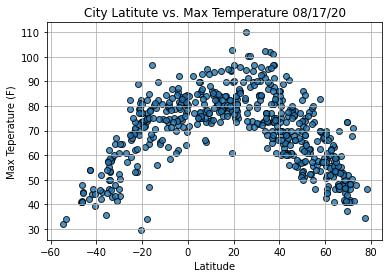

In [16]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Teperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

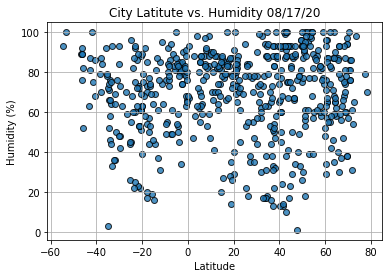

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

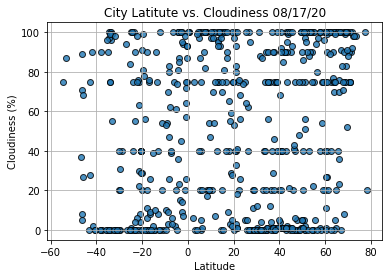

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

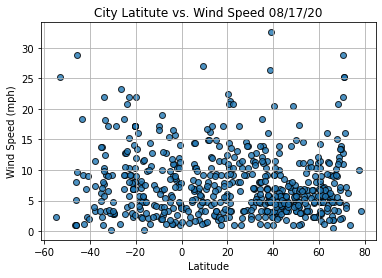

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate other graph activities
plt.title(f"City Latitute vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()